# Logistic Regression as a Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
import scipy
%matplotlib inline

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [3]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [4]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print(m)
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [5]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


In [6]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        #if i % 100 == 0:
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [7]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


In [8]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [9]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [10]:
# model

def model(optimize, X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Start of implementation

### Reading data

In [11]:
bioresponse = pd.read_csv('bioresponse.csv')
features_cols = set(bioresponse.columns)
features_cols.remove('Activity')
x_train, x_test, y_train, y_test = train_test_split(bioresponse[features_cols],
                                                    bioresponse['Activity'],
                                                    test_size=0.25)

In [12]:
#print(x_train)
#print(y_train)

### GD Testing different learning rates

#### 1. learning rate = 0.001

In [13]:
d = model(optimize, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.679099
Cost after iteration 200: 0.671718
Cost after iteration 300: 0.665219
Cost after iteration 400: 0.659211
Cost after iteration 500: 0.653616
Cost after iteration 600: 0.648382
Cost after iteration 700: 0.643469
Cost after iteration 800: 0.638843
Cost after iteration 900: 0.634475
Cost after iteration 1000: 0.630341
Cost after iteration 1100: 0.626420
Cost after iteration 1200: 0.622694
Cost after iteration 1300: 0.619145
Cost after iteration 1400: 0.615760
Cost after iteration 1500: 0.612525
Cost after iteration 1600: 0.609430
Cost after iteration 1700: 0.606464
Cost after iteration 1800: 0.603618
Cost after iteration 1900: 0.600883
train accuracy: 72.05830074653394 %
test accuracy: 71.21535181236675 %


2000
[0.69314718 0.69287316 0.6926048  ... 0.59832933 0.59830349 0.59827766]


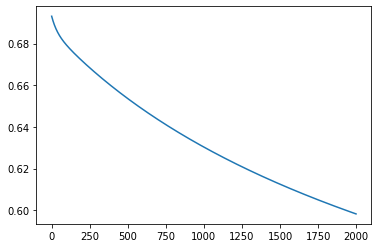

In [14]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 2. learning rate = 0.01

In [15]:
d = model(optimize, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.630292
Cost after iteration 200: 0.598205
Cost after iteration 300: 0.576350
Cost after iteration 400: 0.560008
Cost after iteration 500: 0.547078
Cost after iteration 600: 0.536467
Cost after iteration 700: 0.527536
Cost after iteration 800: 0.519874
Cost after iteration 900: 0.513202
Cost after iteration 1000: 0.507321
Cost after iteration 1100: 0.502082
Cost after iteration 1200: 0.497373
Cost after iteration 1300: 0.493107
Cost after iteration 1400: 0.489217
Cost after iteration 1500: 0.485648
Cost after iteration 1600: 0.482355
Cost after iteration 1700: 0.479302
Cost after iteration 1800: 0.476459
Cost after iteration 1900: 0.473802
train accuracy: 79.48809100604336 %
test accuracy: 74.20042643923242 %


2000
[0.69314718 0.69053607 0.68841939 ... 0.47138151 0.4713573  0.47133311]


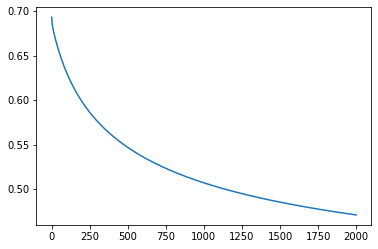

In [16]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 3. learning rate = 0.1

In [17]:
d = model(optimize, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.507147
Cost after iteration 200: 0.471224
Cost after iteration 300: 0.452421
Cost after iteration 400: 0.439850
Cost after iteration 500: 0.430428
Cost after iteration 600: 0.422903
Cost after iteration 700: 0.416648
Cost after iteration 800: 0.411303
Cost after iteration 900: 0.406644
Cost after iteration 1000: 0.402518
Cost after iteration 1100: 0.398819
Cost after iteration 1200: 0.395470
Cost after iteration 1300: 0.392411
Cost after iteration 1400: 0.389598
Cost after iteration 1500: 0.386995
Cost after iteration 1600: 0.384572
Cost after iteration 1700: 0.382309
Cost after iteration 1800: 0.380184
Cost after iteration 1900: 0.378182
train accuracy: 84.32278706007821 %
test accuracy: 76.11940298507463 %


2000
[0.69314718 0.67984813 0.67162376 ... 0.37634619 0.37632776 0.37630934]


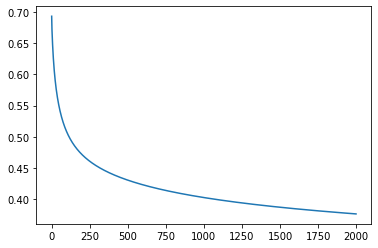

In [18]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 4. learning rate = 0.2

In [19]:
d = model(optimize, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.2, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.478574
Cost after iteration 200: 0.438824
Cost after iteration 300: 0.422409
Cost after iteration 400: 0.411001
Cost after iteration 500: 0.402309
Cost after iteration 600: 0.395315
Cost after iteration 700: 0.389477
Cost after iteration 800: 0.384474
Cost after iteration 900: 0.380102
Cost after iteration 1000: 0.376221
Cost after iteration 1100: 0.372734
Cost after iteration 1200: 0.369569
Cost after iteration 1300: 0.366672
Cost after iteration 1400: 0.364002
Cost after iteration 1500: 0.361525
Cost after iteration 1600: 0.359217
Cost after iteration 1700: 0.357055
Cost after iteration 1800: 0.355022
Cost after iteration 1900: 0.353103
train accuracy: 85.10487024528973 %
test accuracy: 76.75906183368869 %


2000
[0.69314718 0.6939292  0.72667434 ... 0.35134035 0.35132265 0.35130495]


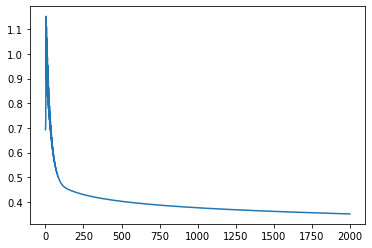

In [20]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 5. learning rate = 0.4

In [21]:
d = model(optimize, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.4, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.871717
Cost after iteration 200: 0.714537
Cost after iteration 300: 0.649669
Cost after iteration 400: 0.608630
Cost after iteration 500: 0.578918
Cost after iteration 600: 0.555813
Cost after iteration 700: 0.537030
Cost after iteration 800: 0.521270
Cost after iteration 900: 0.507759
Cost after iteration 1000: 0.496000
Cost after iteration 1100: 0.485644
Cost after iteration 1200: 0.476425
Cost after iteration 1300: 0.468137
Cost after iteration 1400: 0.460616
Cost after iteration 1500: 0.453736
Cost after iteration 1600: 0.447397
Cost after iteration 1700: 0.441518
Cost after iteration 1800: 0.436038
Cost after iteration 1900: 0.430907
train accuracy: 81.86988979736935 %
test accuracy: 71.74840085287846 %


2000
[0.69314718 0.7913997  2.06890471 ... 0.44191845 0.42617581 0.44181041]


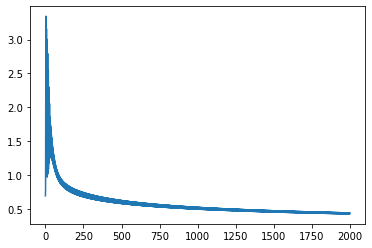

In [22]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

### Stochastic gd

In [23]:
batch_size = 128
def sgd_multi(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    indices = np.arange(X.T.shape[0])
    np.random.shuffle(indices)
    idx_start = 0
    idx_end = 0
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        excess = 0
        if idx_start + batch_size > X.T.shape[0]:
            excess = (idx_start + batch_size) % X.T.shape[0]
            idx_end = X.T.shape[0]
            it_ = np.concatenate((indices[idx_start:], indices[: excess]), axis=0)
        else:
            idx_end = batch_size + idx_start 
            it_ = indices[idx_start: idx_end]
        grads, cost = propagate(w,
                                b,
                                (X.T[it_].T),
                                Y[it_])
        idx_start = ((idx_start + batch_size) % X.T.shape[0]) + excess

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
        

### SGD Testing different learning rates, batch size = 128

#### 1. learning rate = 0.001

In [24]:
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.667644
Cost after iteration 200: 0.666386
Cost after iteration 300: 0.666739
Cost after iteration 400: 0.657316
Cost after iteration 500: 0.646680
Cost after iteration 600: 0.646027
Cost after iteration 700: 0.667996
Cost after iteration 800: 0.649962
Cost after iteration 900: 0.618818
Cost after iteration 1000: 0.619857
Cost after iteration 1100: 0.642668
Cost after iteration 1200: 0.642446
Cost after iteration 1300: 0.611496
Cost after iteration 1400: 0.598978
Cost after iteration 1500: 0.616408
Cost after iteration 1600: 0.606575
Cost after iteration 1700: 0.605668
Cost after iteration 1800: 0.600928
Cost after iteration 1900: 0.594079
train accuracy: 72.27159616068255 %
test accuracy: 70.8955223880597 %


2000
[0.69314718 0.66764415 0.66638582 0.66673926 0.65731625 0.64667992
 0.64602685 0.66799617 0.64996212 0.618818   0.61985676 0.64266829
 0.64244612 0.61149636 0.59897776 0.61640833 0.60657495 0.60566848
 0.60092848 0.59407864]


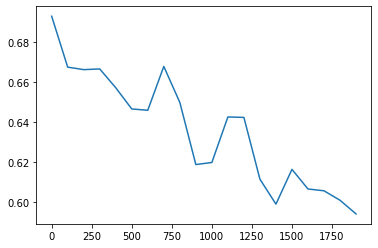

In [25]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

#### 2. learning rate = 0.01

In [26]:
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.641283
Cost after iteration 200: 0.586941
Cost after iteration 300: 0.590866
Cost after iteration 400: 0.575512
Cost after iteration 500: 0.557401
Cost after iteration 600: 0.501214
Cost after iteration 700: 0.589753
Cost after iteration 800: 0.505940
Cost after iteration 900: 0.556594
Cost after iteration 1000: 0.432644
Cost after iteration 1100: 0.481351
Cost after iteration 1200: 0.491366
Cost after iteration 1300: 0.484599
Cost after iteration 1400: 0.476425
Cost after iteration 1500: 0.512833
Cost after iteration 1600: 0.488300
Cost after iteration 1700: 0.500039
Cost after iteration 1800: 0.446479
Cost after iteration 1900: 0.484355
train accuracy: 79.34589406327764 %
test accuracy: 74.20042643923242 %


2000
[0.69314718 0.64128263 0.58694062 0.59086595 0.57551218 0.55740086
 0.50121355 0.58975304 0.5059402  0.55659385 0.43264387 0.48135127
 0.4913659  0.48459864 0.47642516 0.51283263 0.48830027 0.50003915
 0.44647897 0.48435512]


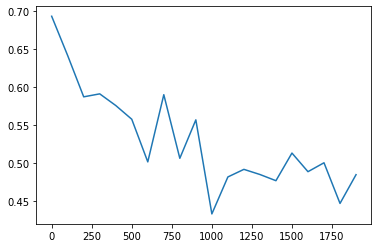

In [27]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

#### 3. learning rate = 0.1

In [28]:
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.501929
Cost after iteration 200: 0.495808
Cost after iteration 300: 0.463741
Cost after iteration 400: 0.429553
Cost after iteration 500: 0.381356
Cost after iteration 600: 0.444185
Cost after iteration 700: 0.430013
Cost after iteration 800: 0.365246
Cost after iteration 900: 0.462779
Cost after iteration 1000: 0.405030
Cost after iteration 1100: 0.454355
Cost after iteration 1200: 0.347224
Cost after iteration 1300: 0.461595
Cost after iteration 1400: 0.342328
Cost after iteration 1500: 0.417856
Cost after iteration 1600: 0.470960
Cost after iteration 1700: 0.344925
Cost after iteration 1800: 0.339555
Cost after iteration 1900: 0.421759
train accuracy: 83.18521151795237 %
test accuracy: 76.65245202558636 %


2000
[0.69314718 0.50192886 0.49580801 0.46374065 0.4295528  0.38135611
 0.44418513 0.43001321 0.36524581 0.46277897 0.40502986 0.45435524
 0.34722382 0.46159548 0.34232769 0.41785618 0.47095952 0.34492518
 0.33955492 0.42175905]


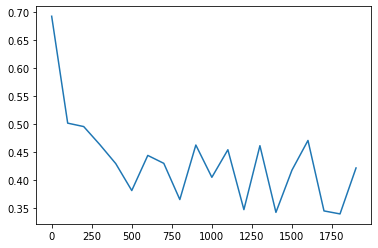

In [29]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

#### 4. learning rate = 0.2

In [30]:
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.2, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.714419
Cost after iteration 200: 0.544250
Cost after iteration 300: 0.412087
Cost after iteration 400: 0.365725
Cost after iteration 500: 0.478061
Cost after iteration 600: 0.374154
Cost after iteration 700: 0.436521
Cost after iteration 800: 0.365854
Cost after iteration 900: 0.401362
Cost after iteration 1000: 0.371189
Cost after iteration 1100: 0.313056
Cost after iteration 1200: 0.300356
Cost after iteration 1300: 0.329579
Cost after iteration 1400: 0.430494
Cost after iteration 1500: 0.379708
Cost after iteration 1600: 0.439810
Cost after iteration 1700: 0.349125
Cost after iteration 1800: 0.337785
Cost after iteration 1900: 0.292597
train accuracy: 84.89157483114113 %
test accuracy: 76.11940298507463 %


2000
[0.69314718 0.71441902 0.54424998 0.41208746 0.36572543 0.47806081
 0.37415429 0.43652077 0.36585377 0.40136198 0.37118856 0.31305637
 0.30035601 0.32957871 0.43049408 0.37970841 0.43980952 0.34912468
 0.3377845  0.29259716]


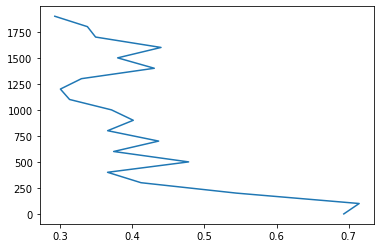

In [31]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(np.array(d["costs"]).flatten(), range(0, d["num_iterations"], 100))

#### 5. learning rate = 0.4

In [32]:
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.4, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.818127
Cost after iteration 200: 0.487221
Cost after iteration 300: 0.829217
Cost after iteration 400: 0.376638
Cost after iteration 500: 0.703186
Cost after iteration 600: 0.458607
Cost after iteration 700: 0.966011
Cost after iteration 800: 0.437242
Cost after iteration 900: 0.456153
Cost after iteration 1000: 0.447452
Cost after iteration 1100: 0.428073
Cost after iteration 1200: 0.447811
Cost after iteration 1300: 0.643575
Cost after iteration 1400: 0.547915
Cost after iteration 1500: 0.543112
Cost after iteration 1600: 0.450946
Cost after iteration 1700: 0.353042
Cost after iteration 1800: 0.390229
Cost after iteration 1900: 0.439670
train accuracy: 85.24706718805545 %
test accuracy: 76.22601279317698 %


2000
[0.69314718 0.81812747 0.48722149 0.8292171  0.3766377  0.70318606
 0.45860716 0.96601117 0.43724217 0.45615271 0.44745152 0.42807282
 0.44781148 0.64357534 0.54791477 0.54311178 0.45094589 0.3530422
 0.39022902 0.43966953]


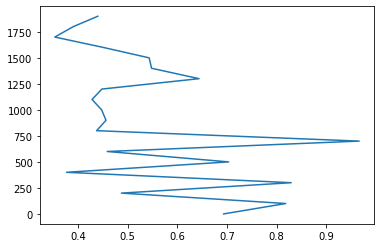

In [33]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(np.array(d["costs"]).flatten(), range(0, d["num_iterations"], 100))

## Conclusion
learning rate is vital for converging as a very high rate will make the gd jump around the minima but never reach it, and very small learning rate will make it very slow to reach the minima or it may never reach it. So we need to find the sweet spot, in our case learning rate 0.2 resulted in less loss after fixed number of iteration.

### SGD Testing different batch sizes, learning rate = 0.001

#### 1. , batch size = 64

In [34]:
batch_size = 64
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.655846
Cost after iteration 200: 0.667070
Cost after iteration 300: 0.687114
Cost after iteration 400: 0.629780
Cost after iteration 500: 0.633430
Cost after iteration 600: 0.663506
Cost after iteration 700: 0.650292
Cost after iteration 800: 0.624890
Cost after iteration 900: 0.650235
Cost after iteration 1000: 0.649593
Cost after iteration 1100: 0.630226
Cost after iteration 1200: 0.623044
Cost after iteration 1300: 0.606494
Cost after iteration 1400: 0.609337
Cost after iteration 1500: 0.627783
Cost after iteration 1600: 0.576795
Cost after iteration 1700: 0.598357
Cost after iteration 1800: 0.586952
Cost after iteration 1900: 0.609684
train accuracy: 71.88055456807679 %
test accuracy: 70.57569296375267 %


2000
[0.69314718 0.65584623 0.66706998 0.68711389 0.62977967 0.63343046
 0.66350562 0.65029178 0.62489019 0.65023524 0.64959251 0.63022575
 0.623044   0.60649401 0.60933747 0.62778262 0.5767947  0.59835677
 0.58695197 0.60968386]


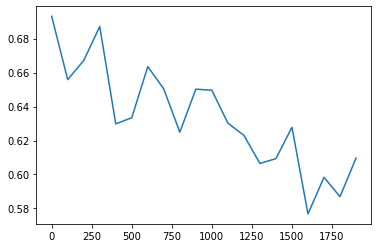

In [35]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

#### 2. , batch size = 32

In [36]:
batch_size = 32
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690219
Cost after iteration 200: 0.678237
Cost after iteration 300: 0.682946
Cost after iteration 400: 0.630226
Cost after iteration 500: 0.633761
Cost after iteration 600: 0.636227
Cost after iteration 700: 0.629409
Cost after iteration 800: 0.651460
Cost after iteration 900: 0.672395
Cost after iteration 1000: 0.668440
Cost after iteration 1100: 0.602828
Cost after iteration 1200: 0.609888
Cost after iteration 1300: 0.642807
Cost after iteration 1400: 0.568274
Cost after iteration 1500: 0.596800
Cost after iteration 1600: 0.639567
Cost after iteration 1700: 0.550903
Cost after iteration 1800: 0.602984
Cost after iteration 1900: 0.589840
train accuracy: 71.80945609669392 %
test accuracy: 70.8955223880597 %


2000
[0.69314718 0.69021908 0.67823684 0.68294551 0.63022567 0.63376085
 0.63622709 0.62940923 0.6514601  0.6723947  0.66844018 0.60282792
 0.60988808 0.64280714 0.56827413 0.5967998  0.63956733 0.55090347
 0.60298364 0.58983994]


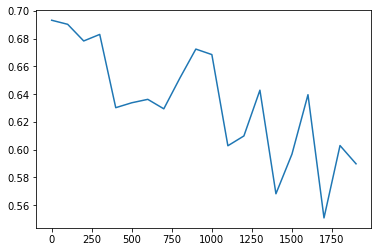

In [37]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

#### 3.  batch size = 16

In [38]:
batch_size = 16
d = model(sgd_multi, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692471
Cost after iteration 200: 0.672918
Cost after iteration 300: 0.688698
Cost after iteration 400: 0.679635
Cost after iteration 500: 0.699712
Cost after iteration 600: 0.697156
Cost after iteration 700: 0.658095
Cost after iteration 800: 0.607564
Cost after iteration 900: 0.636301
Cost after iteration 1000: 0.620118
Cost after iteration 1100: 0.633251
Cost after iteration 1200: 0.699918
Cost after iteration 1300: 0.708202
Cost after iteration 1400: 0.629116
Cost after iteration 1500: 0.581764
Cost after iteration 1600: 0.622393
Cost after iteration 1700: 0.585100
Cost after iteration 1800: 0.606101
Cost after iteration 1900: 0.686654
train accuracy: 71.240668325631 %
test accuracy: 70.25586353944563 %


2000
[0.69314718 0.69247124 0.6729181  0.68869761 0.67963524 0.69971189
 0.69715574 0.65809514 0.60756384 0.63630054 0.62011816 0.63325095
 0.6999181  0.70820163 0.62911558 0.58176378 0.62239276 0.58509956
 0.60610098 0.68665394]


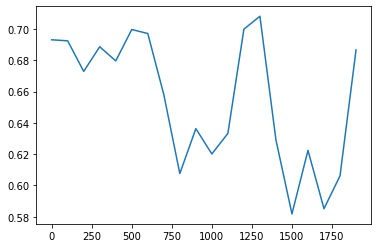

In [39]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"], 100), np.array(d["costs"]).flatten())

## Adam

In [40]:
def adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    m = np.zeros(len(w))
    v = np.zeros(len(w))
    m_b = 0.0
    v_b = 0.0
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        e = 1e-8
        b1 = 0.9
        b2 = 0.999
        # Retrieve derivatives from grads
        dw = grads["dw"].flatten()
        db = grads["db"].flatten()
        m = b1 * m + (1 - b1) * dw
        m_b = b1 * m_b + (1 - b1) * db[0]

        v = b2 * v + (1 - b2) * (dw ** 2)
        v_b = b2 * v_b + (1 - b2) * (db[0] ** 2)
        
        m_c = m / ( 1 - b1 ** (i + 1))
        m_b_c = m_b / ( 1 - b1 ** (i + 1))
        
        v_c = v / (1 - b2 ** (i + 1))
        v_b_c = v_b / (1 - b2 ** (i + 1))
        
        # update rule
        w[:,0] = w[:,0] - (learning_rate * m_c) / (np.sqrt(v_c) + e)
        b = b - (learning_rate * m_b_c) / (np.sqrt(v_b_c) + e)

        # Record the costs
        #if i % 100 == 0:
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Adam Testing different learning rates

#### 1. learning rate = 0.001

In [41]:
d = model(adam, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.500779
Cost after iteration 200: 0.442429
Cost after iteration 300: 0.408938
Cost after iteration 400: 0.385871
Cost after iteration 500: 0.368484
Cost after iteration 600: 0.354622
Cost after iteration 700: 0.343125
Cost after iteration 800: 0.333305
Cost after iteration 900: 0.324728
Cost after iteration 1000: 0.317105
Cost after iteration 1100: 0.310235
Cost after iteration 1200: 0.303975
Cost after iteration 1300: 0.298219
Cost after iteration 1400: 0.292887
Cost after iteration 1500: 0.287916
Cost after iteration 1600: 0.283256
Cost after iteration 1700: 0.278867
Cost after iteration 1800: 0.274717
Cost after iteration 1900: 0.270778
train accuracy: 89.4418769996445 %
test accuracy: 75.3731343283582 %


2000
[0.69314718 0.68440361 0.67998053 ... 0.26713829 0.26710163 0.26706498]


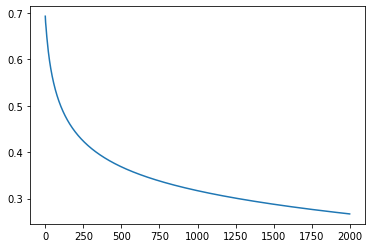

In [42]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 2. learning rate = 0.01

In [43]:
d = model(adam, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.380321
Cost after iteration 200: 0.332279
Cost after iteration 300: 0.304828
Cost after iteration 400: 0.285408
Cost after iteration 500: 0.270352
Cost after iteration 600: 0.258035
Cost after iteration 700: 0.247600
Cost after iteration 800: 0.238544
Cost after iteration 900: 0.230546
Cost after iteration 1000: 0.223383
Cost after iteration 1100: 0.216894
Cost after iteration 1200: 0.210958


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 93.56558833985069 %
test accuracy: 73.56076759061834 %


2000
[0.69314718 0.82483102 0.66491826 ...        nan        nan        nan]


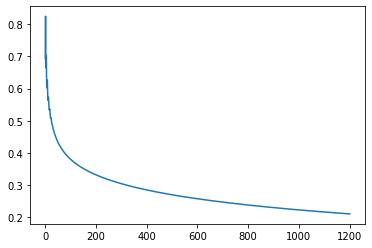

In [44]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 3. learning rate = 0.1

In [45]:
d = model(adam, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 100: 0.307922
Cost after iteration 200: 0.264399
Cost after iteration 300: 0.238134
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 96.05403483825097 %
test accuracy: 72.17484008528784 %


2000
[0.69314718        nan 1.43260833 ...        nan        nan        nan]


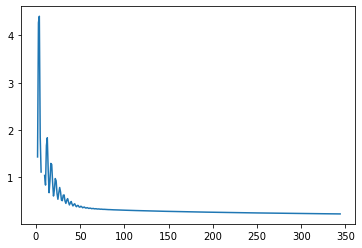

In [46]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 4. learning rate = 0.2

In [47]:
d = model(adam, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.2, print_cost = True)

Cost after iteration 0: 0.693147


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 97.01386420191966 %
test accuracy: 71.64179104477611 %


2000
[0.69314718        nan        nan ...        nan        nan        nan]


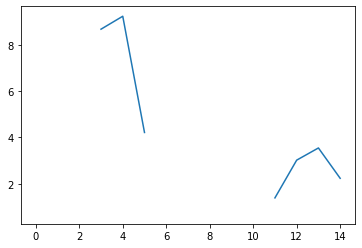

In [48]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

#### 5. learning rate = 0.4

In [49]:
d = model(adam, np.array(x_train.T), np.array(y_train), np.array(x_test.T), np.array(y_test), num_iterations = 2000, learning_rate = 0.4, print_cost = True)

Cost after iteration 0: 0.693147


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 97.40490579452542 %
test accuracy: 71.53518123667376 %


2000
[0.69314718        nan        nan ...        nan        nan        nan]


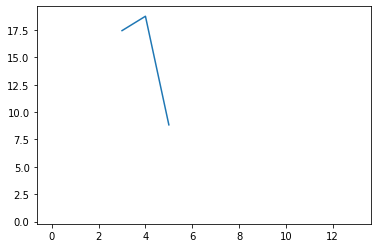

In [50]:
print(d["num_iterations"])
print(np.array(d['costs']).flatten())
plt.plot(range(0, d["num_iterations"]), np.array(d["costs"]).flatten())

## Conclusion
for adam it is always better to start with a small learning rate like 0.001 as it will yield good accuracy and decay later, higher learning rates are chaotic with adam but very small lr will decay very fast.
in a lot of cases adam is better than sgd as it is more adaptable especially when we are uncertain with our parameters. but stochastic gd sometimes can be more stable although better result is not guaranteed.